In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import *
from sklearn.cluster import *
from sklearn.metrics import *

In [2]:
country = pd.read_csv("/Users/dariashavronskaia/Desktop/data science/data/Country-data.csv")

In [3]:
country['life_expec'].max()

82.8

In [4]:
scaler = StandardScaler()
X = country.drop('country',axis =1)  
y = country['country']
X_scaled = scaler.fit_transform(X)

In [5]:
X_scaled[0][0]

1.2915323778422956

<Axes: >

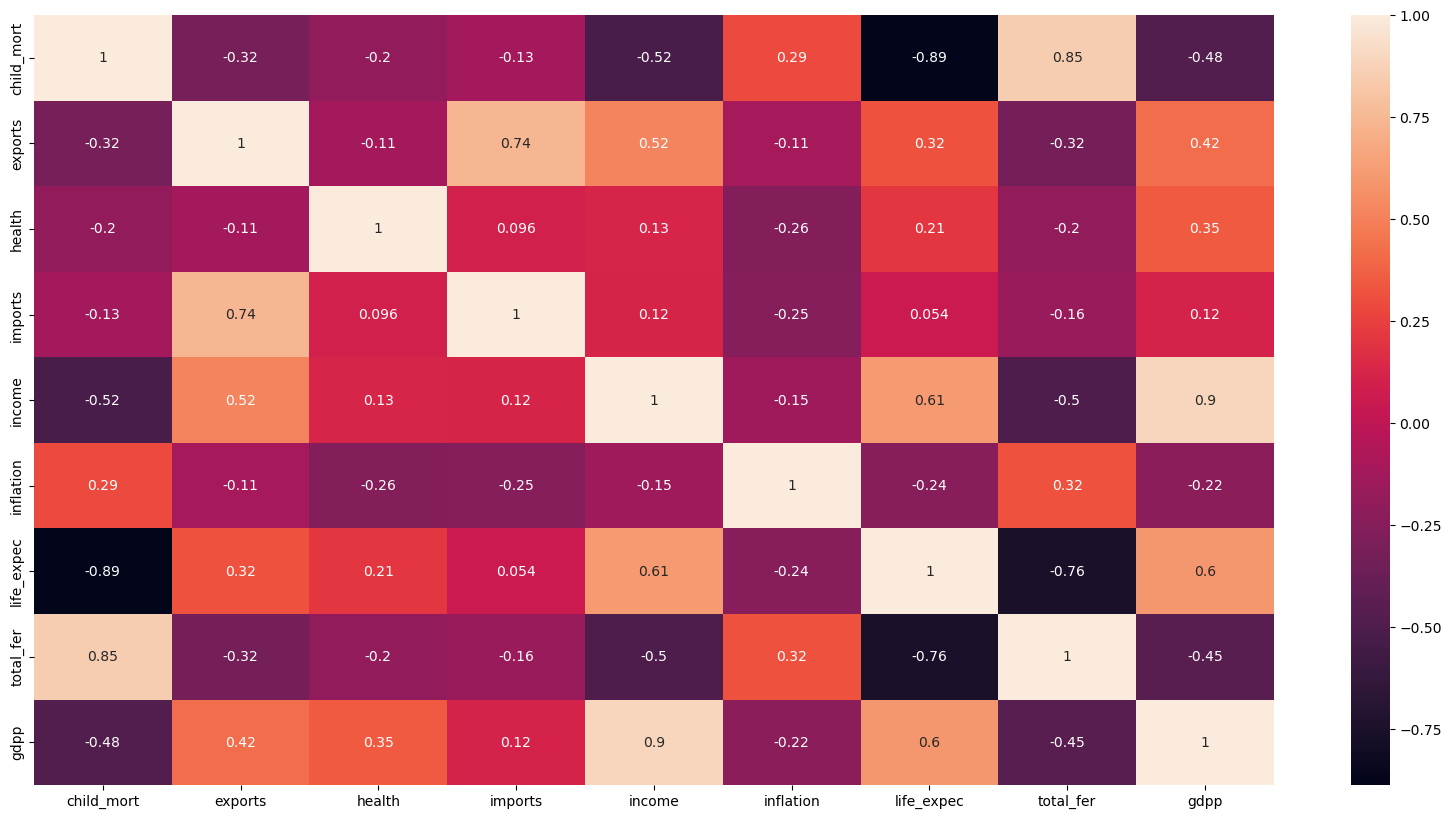

In [6]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [7]:
pca = PCA(n_components=0.9, random_state=42).fit(X_scaled)

In [8]:
len(pca.components_)

5

In [10]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

<Axes: >

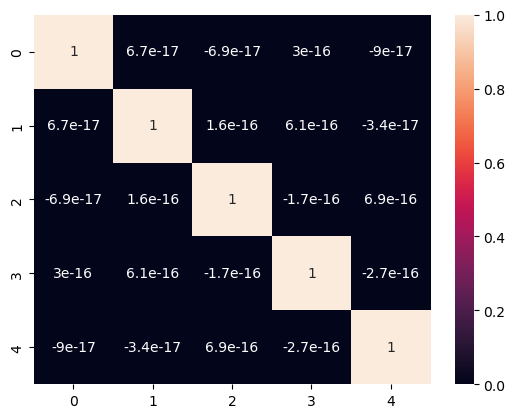

In [15]:
X_pca = pca.fit_transform(X_scaled)
corrmat = np.corrcoef(X_pca.transpose())
sns.heatmap(corrmat, annot=True)

In [17]:
corrmat > 0.001

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True]])

In [22]:
for i in range(2,10):
    km = KMeans(n_clusters = i, random_state = 42).fit(X_scaled)
    y_pred = km.labels_
    print (i, silhouette_score(X_scaled,  y_pred))

/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

2 0.287356689214067
3 0.28329575683463126
4 0.301375962376881
5 0.2992594995920442
6 0.2350698927516289


/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 0.24905003461730515
8 0.2414024552159115
9 0.20340692932613638


/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

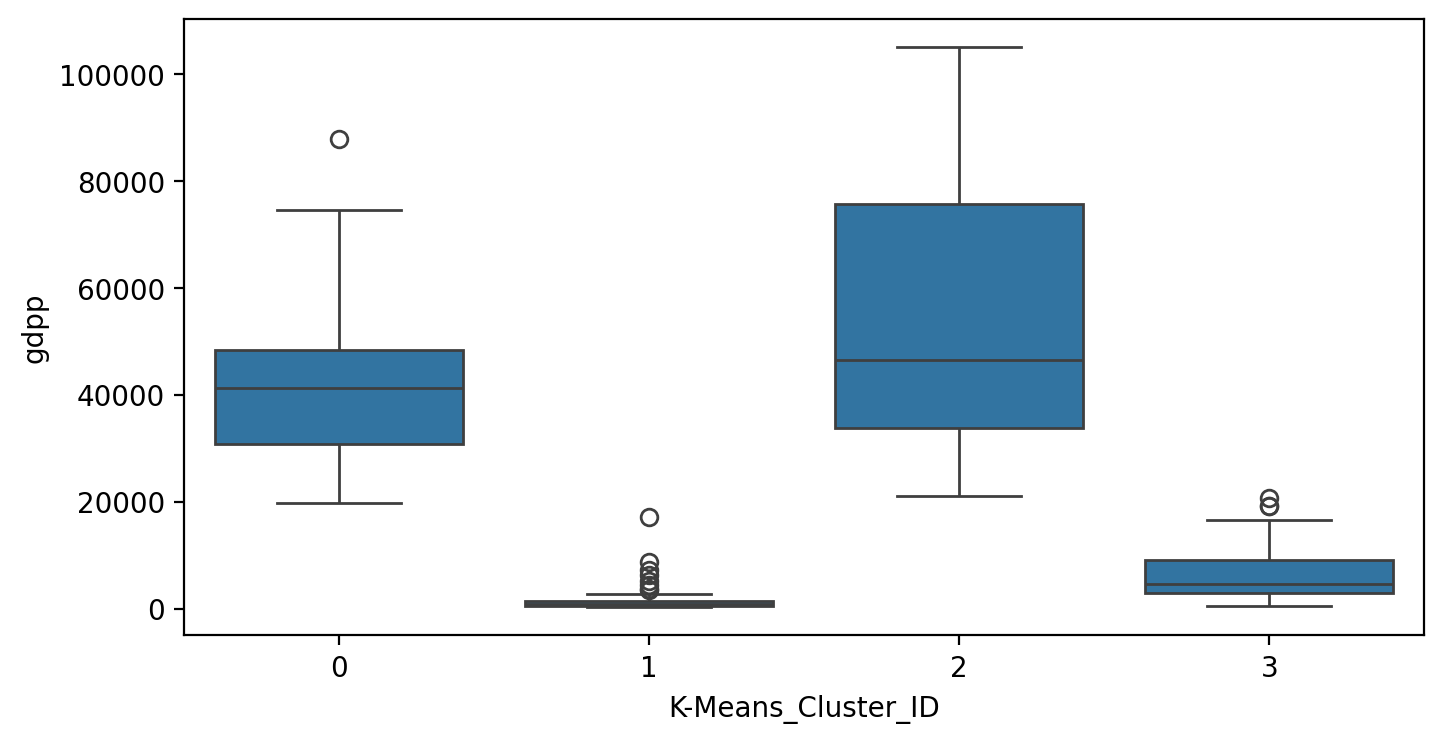

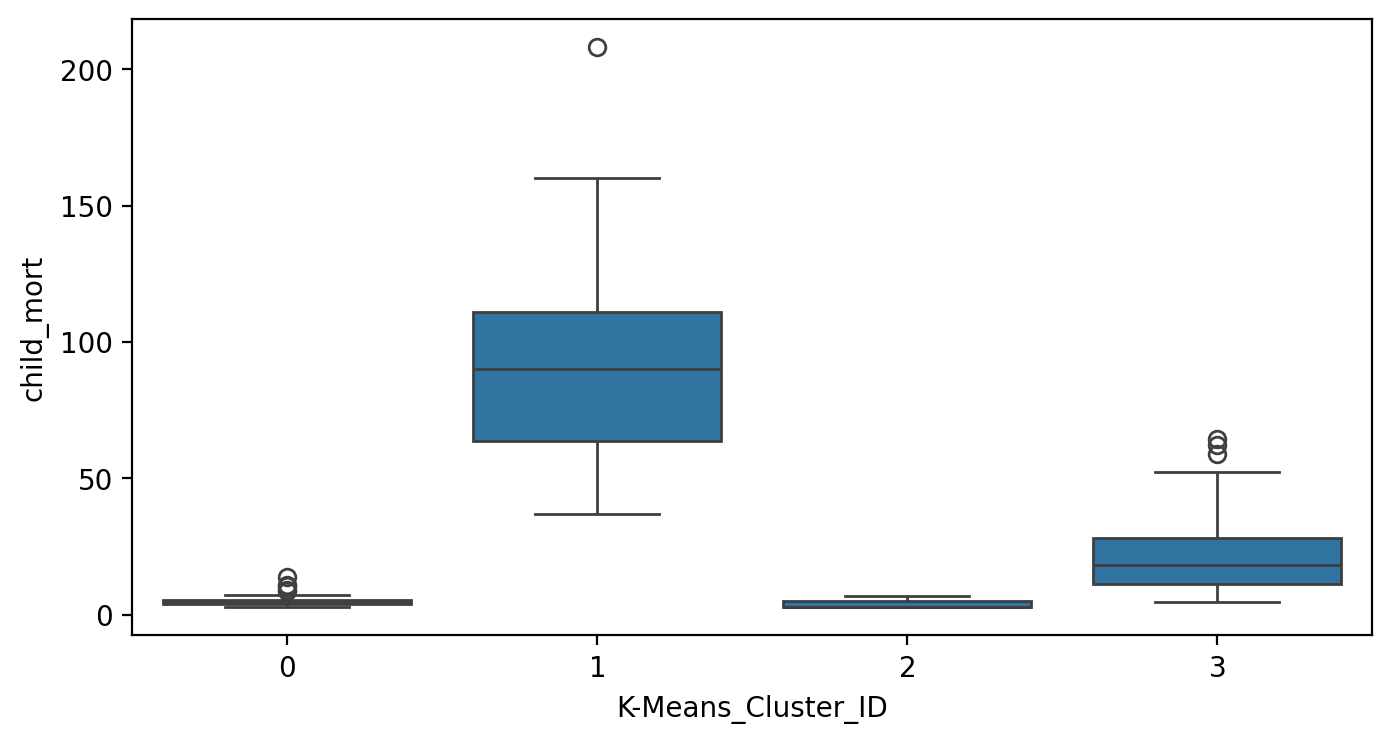

In [26]:
kmeans = KMeans(n_clusters=4, random_state=1).fit(X_scaled)
country['K-Means_Cluster_ID'] = kmeans.labels_
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=country)
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=country)

In [27]:
K_Means_countries = country[country['K-Means_Cluster_ID'] == 1]
K_Means_countries.sort_values(by = 'life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,1
87,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
166,Zambia,83.1,37.00,5.89,30.9,3280,14.000,52.0,5.40,1460,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,1
137,South Africa,53.7,28.60,8.94,27.4,12000,6.350,54.3,2.59,7280,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,1
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
